## **Exam Project Notebook - Data Visualization**  
## *World Happiness 2015-2024: Drivers, Stories, and Regional Trends*  

---

**Author:** *Matteo Fumagalli*  
**Student ID:** *894468*  
**University:** *University of Milano-Bicocca*  
**Degree Program:** *Master’s Degree in Data Science*   
**Academic Year:** *2025/2026*

---

### **Notebook Description**
This notebook contains the data analysis pipeline for the **World Happiness dataset (2015-2024)**.  
The workflow includes data preprocessing (cleaning, preparation, and aggregation) and exploratory analysis performed in **Python**.  
The aim is to extract meaningful insights and tell journalistic stories about this topic.  

All steps are fully reproducible from the files provided in this repository.

--- 

### **Research Questions**
| Topic | Research Questions |
|-------|------------------|
| **Global trends and drivers** | How have global happiness levels evolved from 2015 to 2024?<br>Which factors show the strongest correlation with the overall happiness score? |
| **European happiness situation** | How has the European happiness landscape changed over the last decade (2015-2024)?
| **Regional dynamics and inequalities** | How have happiness levels evolved across different world regions over time? Are regional positions relatively stable, or do they shift significantly over time? <br> How has the regional gap evolved, and how do top-performing and bottom-performing regions differ in terms of key happiness drivers? 

---

## **0 - Environment Setup**

This section imports all required Python libraries, sets display and plotting options, and defines the path for tbe folders.

In [1]:
# To create the Python environment for this project, use the `environment.yml` 
# file, with the following command: conda env create -f environment.yml

# Libraries import
import country_converter as coco
import matplotlib
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm, to_hex
import matplotlib.patheffects as path_effects
import numpy as np
import os
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import seaborn as sns

# To use the xkcd font:
# - Download it from 
# https://github.com/ipython/xkcd-font/blob/master/xkcd-script/font/xkcd-script.ttf
# - Insert the .ttf file into the matplotlib folder [matplotlib.get_data_path()]
# - Delete the existing cache [matplotlib.get_cachedir()]
# - Reconstruct the cache
fm.findSystemFonts()
fm.findfont('xkcd Script', rebuild_if_missing=True)

# Use the xkcd cartoon style
plt.xkcd()

plt.rcParams.update({
    'font.family': 'xkcd Script',
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

# Data path
data_folder = 'data'
visualizations_folder = 'visualizations'

---

## **1 - Data Loading**

This section loads the dataset and provides a brief description about its structure.

In [91]:
# Load the dataset
file_path = os.path.join(data_folder, 'world_happiness.csv')
df = pd.read_csv(file_path, sep=';')

In [4]:
# Display the first five rows before preprocessing
display(df.head(5))

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015


In [5]:
# Display columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       1502 non-null   int64 
 1   Country                       1502 non-null   object
 2   Regional indicator            1499 non-null   object
 3   Happiness score               1502 non-null   object
 4   GDP per capita                1502 non-null   object
 5   Social support                1502 non-null   object
 6   Healthy life expectancy       1502 non-null   int64 
 7   Freedom to make life choices  1502 non-null   object
 8   Generosity                    1502 non-null   object
 9   Perceptions of corruption     1502 non-null   object
 10  Year                          1502 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 129.2+ KB


---

## **2 - Exploratory Data Analysis**

This section explores the data to understand distributions, identify patterns, and compute summary statistics.

In [96]:
# Clean column names for consistency
df.columns = df.columns.str.strip()
numeric_cols = []

# Converting numeric columns
numeric_cols = ['Happiness score', 'GDP per capita', 'Social support', 
                'Healthy life expectancy', 'Freedom to make life choices', 
                'Generosity', 'Perceptions of corruption']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
# Display summary statistics about numeric columns before cleaning
df[['Happiness score', 'GDP per capita', 'Social support', 
    'Healthy life expectancy', 'Freedom to make life choices', 
    'Generosity', 'Perceptions of corruption']].describe()

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,5.448857,6.107178,0.691842,66.670439,0.658935,0.320369,0.452764
std,1.125638,2.499571,0.212647,7.671376,0.216441,0.172669,0.321786
min,1.721000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000
25%,4.593425,4.375967,0.564507,62.000000,0.535942,0.196085,0.158585
50%,5.469650,6.305600,0.738190,68.000000,0.690305,0.296375,0.345325
75%,6.278450,8.047867,0.861528,72.000000,0.831792,0.430042,0.782560
max,7.842100,10.000000,1.000000,85.000000,1.000000,1.000000,1.000000


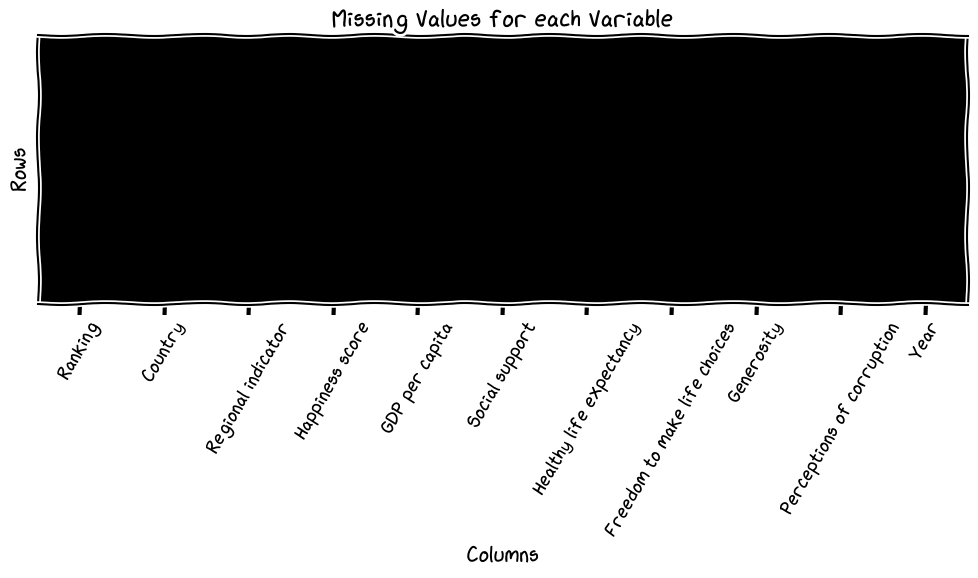

Percentual of missing values for each variable:
Ranking                         0.0 %
Country                         0.0 %
Regional indicator              0.2 %
Happiness score                 0.0 %
GDP per capita                  0.0 %
Social support                  0.0 %
Healthy life expectancy         0.0 %
Freedom to make life choices    0.0 %
Generosity                      0.0 %
Perceptions of corruption       0.0 %
Year                            0.0 %
dtype: object


In [97]:
# Display the NaN values for each column
plt.figure(figsize=(10,6))
plt.imshow(df.isna(), aspect='auto', interpolation='none', cmap='gray')
plt.title('Missing Values for each Variable')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(range(len(df.columns)), df.columns, rotation=60)
plt.yticks([])
plt.tight_layout()
plt.show()

percent_missing = df.isna().mean() * 100
print('Percentual of missing values for each variable:')
print(percent_missing.round(2).astype(str) + ' %')

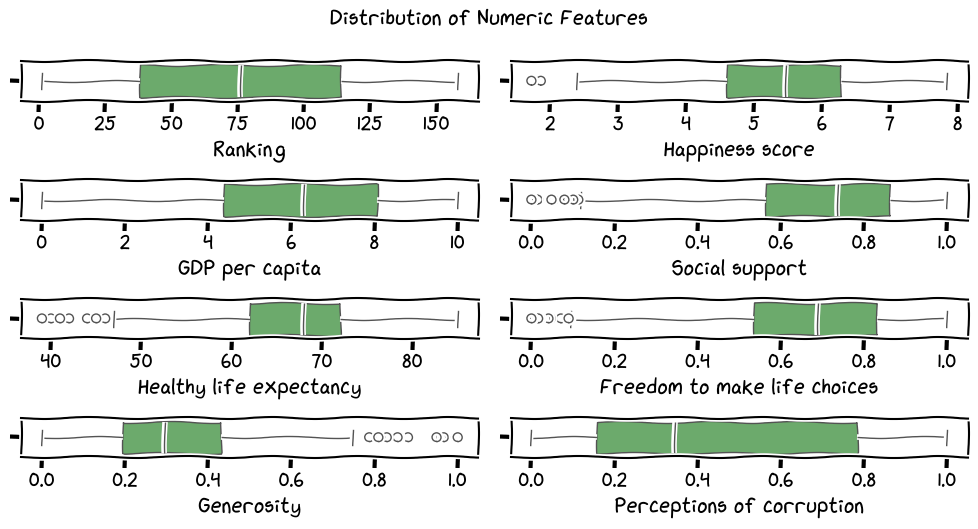

In [99]:
# Display distributions about numeric variables
plt.figure(figsize=(10,6))

exclude_cols = ['Country', 'Regional indicator', 'Year']
for i, col in enumerate([col for col in df.columns 
                         if col not in exclude_cols], 1):
    plt.subplot((len(df.columns) - len(exclude_cols)) // 2 + 1, 2, i)
    sns.boxplot(x=df[col], color='#62b462')

plt.suptitle('Distribution of Numeric Features', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(hspace=2)
plt.show()

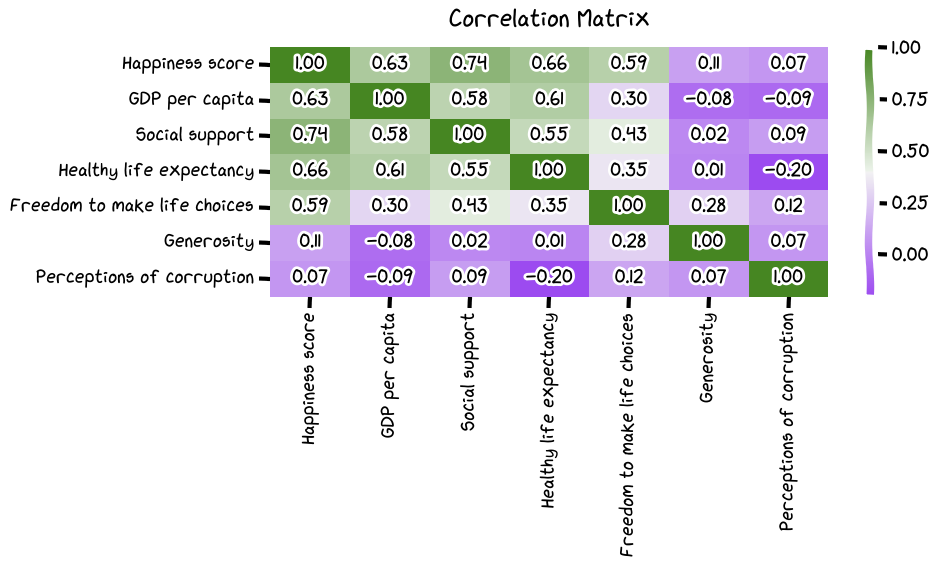

In [100]:
# Display the correlation among numeric variables
corrs = df[['Happiness score', 'GDP per capita', 'Social support', 
    'Healthy life expectancy', 'Freedom to make life choices', 
    'Generosity', 'Perceptions of corruption']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True, fmt='.2f', 
            annot_kws={'color': 'black'},
            cmap=sns.diverging_palette(
                280, 120, s=90, l=50, as_cmap=True))
plt.title('Correlation Matrix', y=1.05)
plt.tight_layout()
plt.show()

---

## **3 - Data Cleaning and Preprocessing**

This section handles missing and incosistent values, performs necessary transformations, and prepares the dataset for further analysis and visualization.   

In [22]:
# Correct wrong Country
df['Country'] = df['Country'].replace({'Argelia': 'Algeria'})

# Display countries whose Regional indicator is null
df[df['Regional indicator'].isnull()]

# Display countries whose Regional indicator varies in different years
regional_counts = (df.groupby('Country')['Regional indicator']
                   .nunique().reset_index())
regional_counts = regional_counts.rename(
    columns={'Regional indicator': 'Num Regional indicators'})
num_multiple_regional = (regional_counts['Num Regional indicators'] > 1).sum()
print(f'Countries with different Regional indicator: {num_multiple_regional}')

if num_multiple_regional != 0:
    display(regional_counts[regional_counts['Num Regional indicators'] > 1])

Countries with different Regional indicator: 25


,Country,Num Regional indicators
2,Algeria,2
37,Cyprus,3
38,Czech Republic,2
39,Czechia,2
46,Estonia,2
53,Georgia,2
56,Greece,2
63,Hungary,2
81,Laos,3
82,Latvia,2


In [23]:
# Obtain Country standardized, iso3 code, Region standardized, and Continent
df['Country standardized'] = coco.convert(
    names=df['Country'], to='name_short', not_found=None)
df[df['Country standardized'].isna()]['Country'].unique()

df['Country iso3'] = coco.convert(names=df['Country standardized'], to='ISO3')
df['Region standardized'] = coco.convert(
    names=df['Country standardized'], to='UNregion')
df['Continent'] = coco.convert(names=df['Country standardized'], to='continent')

# Display countries whose Region standardized varies in different years
regional_standardized_counts = (df.groupby('Country')['Region standardized']
                                .nunique().reset_index())
regional_standardized_counts = (regional_standardized_counts.rename(
    columns={'Region standardized': 'Num Region standardized'}))
num_multiple_regional_standardized = (
    regional_standardized_counts['Num Region standardized'] > 1).sum()
print(f'Countries with different Region standardized: ' 
      f'{num_multiple_regional_standardized}')

if num_multiple_regional_standardized != 0:
    display(regional_standardized_counts[
        regional_standardized_counts['Num Region standardized'] > 1])

Countries with different Region standardized: 0


In [24]:
# Remove duplicates
duplicated_rows = df[df.duplicated(
    subset=['Country standardized', 'Year'], keep=False)]

if duplicated_rows.empty:
    print('No duplicates')
else:
    print('Duplicated rows:')
    display(duplicated_rows.sort_values(by=['Country standardized', 'Year'])
          [['Country', 'Country standardized', 'Year']])

    # Remove non-official entities mapped to the same Country standardized
    df = df[~df['Country'].isin(['North Cyprus', 'Somaliland region'])]

Duplicated rows:


,Country,Country standardized,Year
65,North Cyprus,Cyprus,2015
66,Cyprus,Cyprus,2015
302,North Cyprus,Cyprus,2016
304,Cyprus,Cyprus,2016
407,North Cyprus,Cyprus,2017
419,Cyprus,Cyprus,2017
163,Somalia,Somalia,2016
190,Somaliland region,Somalia,2016


In [25]:
# Handle GDP per capita values equal to 0
print('Regions with GDP per capita equal to 0:')
display(df[df['GDP per capita'] == 0])

df.loc[:, 'GDP per capita'] = df['GDP per capita'].replace(0, np.nan)
df['GDP per capita'] = (df.groupby('Country standardized')['GDP per capita']
                        .transform(lambda x: x.interpolate(
                            method='linear', limit_direction='both')))

Regions with GDP per capita equal to 0:


,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Country standardized,Country iso3,Region standardized,Continent
119,120,Congo (Kinshasa),Sub-Saharan Africa,4.5170,0.0,0.71400,42,0.33753,0.31203,0.86185,2015,DR Congo,COD,Middle Africa,Africa
163,76,Somalia,Sub-Saharan Africa,5.4400,0.0,0.28407,49,0.93311,0.33213,0.61717,2016,Somalia,SOM,Eastern Africa,Africa
469,155,Central African Republic,Sub-Saharan Africa,2.6930,0.0,0.00000,48,0.41146,0.33514,0.12183,2017,Central African Republic,CAF,Middle Africa,Africa
594,98,Somalia,Sub-Saharan Africa,4.9815,0.0,0.00000,55,0.92980,0.39825,0.61731,2018,Somalia,SOM,Eastern Africa,Africa
735,112,Somalia,Sub-Saharan Africa,4.6679,0.0,0.42977,63,0.88607,0.42957,0.59754,2019,Somalia,SOM,Eastern Africa,Africa
918,140,Burundi,Sub-Saharan Africa,3.7753,0.0,0.26078,53,0.39725,0.32888,0.60202,2020,Burundi,BDI,Eastern Africa,Africa
951,140,Burundi,Sub-Saharan Africa,3.7753,0.0,0.05329,53,0.41572,0.31852,0.61230,2021,Burundi,BDI,Eastern Africa,Africa
1220,108,Venezuela,Latin America and Caribbean,4.9255,0.0,0.73330,74,0.38197,0.48141,0.13911,2022,Venezuela,VEN,South America,America
1312,88,Venezuela,Latin America and Caribbean,5.2106,0.0,0.77587,64,0.47789,0.48704,0.84973,2023,Venezuela,VEN,South America,America
1497,78,Venezuela,Latin America and Caribbean,5.6067,0.0,0.81740,70,0.59990,0.47969,0.14982,2024,Venezuela,VEN,South America,America


In [26]:
# Handle GDP per capita values about 2016 which are distorted
regional_means_2016 = (df[df['Year'] == 2016]
                       .groupby('Region standardized')['GDP per capita']
                       .mean())
print('Mean GDP per capita for each Region in 2016 (before correction): ')
display(regional_means_2016.reset_index())

for idx in df[df['Year'] == 2016].index:
    country = df.loc[idx, 'Country standardized']
    gdp_2015 = df.loc[
        (df['Country standardized'] == country) & (df['Year'] == 2015), 
        'GDP per capita']
    gdp_2015 = gdp_2015.values[0] if not gdp_2015.empty else np.nan

    gdp_2017 = df.loc[
        (df['Country standardized'] == country) & (df['Year'] == 2017), 
        'GDP per capita']
    gdp_2017 = gdp_2017.values[0] if not gdp_2017.empty else np.nan
    
    if not np.isnan(gdp_2015) and not np.isnan(gdp_2017):
        df.loc[idx, 'GDP per capita'] = (gdp_2015 + gdp_2017) / 2
    elif not np.isnan(gdp_2015):
        df.loc[idx, 'GDP per capita'] = gdp_2015
    elif not np.isnan(gdp_2017):
        df.loc[idx, 'GDP per capita'] = gdp_2017
    else:
        region = df.loc[idx, 'Region standardized']
        df.loc[idx, 'GDP per capita'] = regional_means_2016[region]

print('Mean GDP per capita for each Region in 2016 (after correction): ')
display(df[df['Year'] == 2016]
        .groupby('Region standardized')['GDP per capita']
        .mean().reset_index())

Mean GDP per capita for each Region in 2016 (before correction): 


,Region standardized,GDP per capita
0,Australia and New Zealand,9.899595
1,Caribbean,9.970140
2,Central America,9.856585
3,Central Asia,9.722840
4,Eastern Africa,8.749132
5,Eastern Asia,9.930945
6,Eastern Europe,9.940497
7,Middle Africa,9.408342
8,Northern Africa,9.925698
9,Northern America,9.988515


Mean GDP per capita for each Region in 2016 (after correction): 


,Region standardized,GDP per capita
0,Australia and New Zealand,7.683423
1,Caribbean,5.874241
2,Central America,4.982242
3,Central Asia,4.427422
4,Eastern Africa,1.903883
5,Eastern Asia,6.931324
6,Eastern Europe,6.147111
7,Middle Africa,4.030588
8,Northern Africa,5.060672
9,Northern America,8.066948


In [27]:
# Handle erroneous pattern between GDP per capita and Social support in 2018
regional_means_2018 = (df[df['Year'] == 2018]
                       .groupby('Region standardized')[
                           ['GDP per capita', 'Social support']]
                       .mean())

for col in ['GDP per capita', 'Social support']:
    for idx in df[df['Year'] == 2018].index:
        country = df.loc[idx, 'Country standardized']
        gdp_2017 = df.loc[
            (df['Country standardized'] == country) & (df['Year'] == 2017), 
            col]
        gdp_2017 = gdp_2017.values[0] if not gdp_2017.empty else np.nan

        gdp_2019 = df.loc[
            (df['Country standardized'] == country) & (df['Year'] == 2019), 
            col]
        gdp_2019 = gdp_2019.values[0] if not gdp_2019.empty else np.nan
        
        if not np.isnan(gdp_2017) and not np.isnan(gdp_2019):
            df.loc[idx, 'GDP per capita'] = (gdp_2017 + gdp_2019) / 2
        elif not np.isnan(gdp_2017):
            df.loc[idx, 'GDP per capita'] = gdp_2017
        elif not np.isnan(gdp_2019):
            df.loc[idx, 'GDP per capita'] = gdp_2019
        else:
            region = df.loc[idx, 'Region standardized']
            df.loc[idx, col] = regional_means_2018[region, col]        

In [28]:
# Remove useless columns and reorder the others
df.drop(columns=['Country', 'Regional indicator'], inplace=True)
priority_columns = ['Country standardized', 'Country iso3', 
                    'Region standardized', 'Continent', 'Year', 'Ranking']
other_columns = [col for col in df.columns if col not in priority_columns]
df = df[priority_columns + other_columns]

# Order data with respect to Year and Ranking
df.sort_values(by=['Year', 'Ranking'], inplace=True)

# Display the first five rows after preprocessing
df.head(5)

,Country standardized,Country iso3,Region standardized,Continent,Year,Ranking,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,CHE,Western Europe,Europe,2015,1,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941
1,Iceland,ISL,Northern Europe,Europe,2015,2,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371
2,Denmark,DNK,Northern Europe,Europe,2015,3,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382
3,Norway,NOR,Northern Europe,Europe,2015,4,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860
4,Canada,CAN,Northern America,America,2015,5,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285


In [ ]:
# Save the dataframe after preprocessing
output_path = os.path.join(data_folder, 'world_happiness_cleaned.csv')
df.to_csv(output_path, sep=',', index=False)

---

## **4 - Insights and Stories**

This section summarizes initial findings from the dataset.
Then, it presents the main narratives derived from the analysis, connecting visualizations and results to the research questions.

In [2]:
# Load the cleaned dataset
file_path = os.path.join(data_folder, 'world_happiness_cleaned.csv')
df = pd.read_csv(file_path, sep=',')

# Define a diverging colorscale obtained with ColorBrewer
colorscale = [
    [0.0, "#40004b"],
    [0.15, "#762a83"],
    [0.30, '#9970ab'],
    [0.45, "#c2a5cf"],
    [0.609, "#e7d4e8"],
    [0.61, "#d9f0d3"],
    [0.7, '#a6dba0'],
    [0.8, '#5aae61'],
    [0.90, "#1b7837"],
    [1.0, "#00441b"]
]

colorscale_uniform = [
    [0.0, "#40004b"],
    [0.13, "#762a83"],
    [0.26, '#9970ab'],
    [0.38, "#c2a5cf"],
    [0.5, "#e7d4e8"],
    [0.5000001, "#d9f0d3"],
    [0.62, '#a6dba0'],
    [0.74, '#5aae61'],
    [0.87, "#1b7837"],
    [1.0, "#00441b"]
]

colorscale_europe = [
    [0.0, "#40004b"],
    [0.15, "#762a83"],
    [0.30, '#9970ab'],
    [0.45, "#c2a5cf"],
    [0.589, "#e7d4e8"],
    [0.59, "#d9f0d3"],
    [0.7, '#a6dba0'],
    [0.8, '#5aae61'],
    [0.90, "#1b7837"],
    [1.0, "#00441b"]
]

# Generate a custom colormap 
segments = [(item[0], item[1]) for item in colorscale]
segments_uniform = [(item[0], item[1]) for item in colorscale_uniform]

cmap_sns = LinearSegmentedColormap.from_list(
    'custom_rgy', segments
)

cmap_sns_uniform = LinearSegmentedColormap.from_list(
    'custom_rgy', segments_uniform
)

overall_mean = df["Happiness score"].mean() 

# Normalize the colormap centered on the mean
norm = TwoSlopeNorm(
    vmin=df['Happiness score'].min(),
    vcenter=overall_mean, 
    vmax=df['Happiness score'].max() 
)

# Normalize the colormap for the correlation
v_limit = 1
norm_corr = TwoSlopeNorm(
    vmin=-v_limit, 
    vmax=v_limit,
    vcenter=-0.2
)

In [31]:
# Create summary statistics for the entire dataset
print('Dataset overview')
print(f"Total observations: {len(df):,}")
print(f"Countries tracked: {df['Country standardized'].nunique()}")
print(f"Regions tracked: {df['Region standardized'].nunique()}")
print(f"Continents tracked: {df['Continent'].nunique()}")
print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")

Dataset overview
Total observations: 1,497
Countries tracked: 163
Regions tracked: 19
Continents tracked: 5
Years covered: 2015 - 2024


In [32]:
# Create summary statistics for the Happiness score
print('Happiness score')
print(f"Average Happiness score: {df['Happiness score'].mean():.2f}")
print(f"Median Happiness score: {df['Happiness score'].median():.2f}")
happiest_country = (df.loc[
    df['Happiness score'].idxmax(), 
    ['Country standardized', 'Happiness score', 'Year']])
print(f'Happiest country overall: ' 
      f"{happiest_country['Country standardized']} - " 
      f"{happiest_country['Happiness score']:.2f} "
      f"({happiest_country['Year']})")
least_happy_country = (df.loc[
    df['Happiness score'].idxmin(), 
    ['Country standardized', 'Happiness score', 'Year']])
print(f'Least happy country overall: '
      f"{least_happy_country['Country standardized']} - " 
      f"{least_happy_country['Happiness score']:.2f} "
      f"({least_happy_country['Year']})")

Happiness score
Average Happiness score: 5.45
Median Happiness score: 5.47
Happiest country overall: Finland - 7.84 (2021)
Least happy country overall: Afghanistan - 1.72 (2024)


In [33]:
# Display the number of countries for each Region standardized
region_counts = (df.groupby('Region standardized')['Country standardized']
                 .nunique().reset_index(name='num_countries'))
print('Number of Countries per Region')
display(region_counts)

Number of Countries per Region


,Region standardized,num_countries
0,Australia and New Zealand,2
1,Caribbean,5
2,Central America,8
3,Central Asia,5
4,Eastern Africa,16
5,Eastern Asia,6
6,Eastern Europe,10
7,Middle Africa,7
8,Northern Africa,6
9,Northern America,2


In [34]:
# Display the number of countries for each Continent
continent_counts = (df.groupby('Continent')['Country standardized']
                 .nunique().reset_index(name='num_countries'))
print('Number of Countries per Continent')
display(continent_counts)

Number of Countries per Continent


,Continent,num_countries
0,Africa,48
1,America,26
2,Asia,47
3,Europe,40
4,Oceania,2


#### "A decade overview: is the world happier today than 10 years ago?"

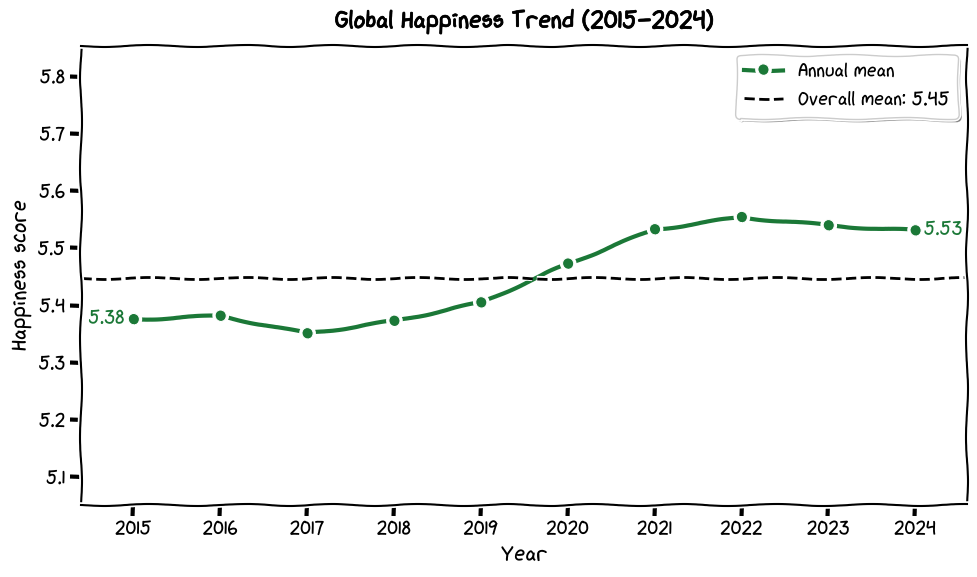

Insight: the global average happiness has increased by 0.155 points from 2015 to 2024


In [17]:
# Line plot with global average Happiness score per Year
global_happiness = (df.groupby('Year')['Happiness score']
                    .mean().reset_index(name='Mean happiness score'))
overall_mean = df['Happiness score'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=global_happiness, x='Year', y='Mean happiness score', 
             color=colorscale[8][1], marker='o', markersize=8, 
             linewidth=3, label='Annual mean')
plt.axhline(overall_mean, color='black', linestyle='--', linewidth=2,
            label=f'Overall mean: {overall_mean:.2f}')

plt.text(
    global_happiness['Year'].iloc[0] - 0.1,
    global_happiness['Mean happiness score'].iloc[0],
    f"{global_happiness['Mean happiness score'].iloc[0]:.2f}",
    va='center', ha='right', color=colorscale[8][1])

plt.text(
    global_happiness['Year'].iloc[-1] + 0.1,
    global_happiness['Mean happiness score'].iloc[-1],
    f"{global_happiness['Mean happiness score'].iloc[-1]:.2f}", 
    va='center', ha='left', color=colorscale[8][1])

plt.title('Global Happiness Trend (2015-2024)', y=1.02).set_path_effects([
    path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Year')
plt.ylabel('Happiness score')
plt.xticks(sorted(global_happiness['Year'].unique()))
plt.xlim(global_happiness['Year'].min() - 0.6, 
         global_happiness['Year'].max() + 0.6)
plt.ylim(global_happiness['Mean happiness score'].min() - 0.3,
         global_happiness['Mean happiness score'].max() + 0.3)

plt.legend(frameon=True, fancybox=True, shadow=True)
plt.tight_layout()

output_path = os.path.join(visualizations_folder, 'line_plot_global_trend.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# Insight
trend_direction = ('increased' if 
                   global_happiness['Mean happiness score'].iloc[-1] > 
                   global_happiness['Mean happiness score'].iloc[0] 
                   else 'decreased')
change = (global_happiness['Mean happiness score'].iloc[-1] 
          - global_happiness['Mean happiness score'].iloc[0])
print(f'Insight: the global average happiness has {trend_direction} '
      f'by {abs(change):.3f} points from 2015 to 2024')

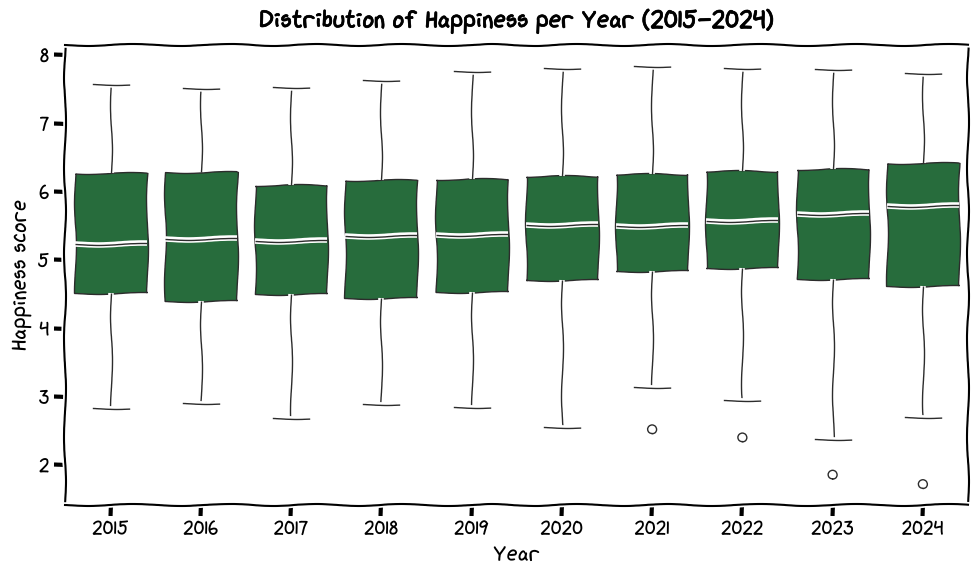

Insight: the global happiness levels are relatively stable over the period 2015-2024, with median scores ranging from 5.23 to 5.80


In [13]:
# Boxplot for the distribution of Happiness score per Year
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Year', y='Happiness score', color=colorscale[8][1])
plt.title('Distribution of Happiness per Year (2015-2024)', 
          y=1.02).set_path_effects([
              path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.tight_layout()
output_path = os.path.join(visualizations_folder, 'boxplot_happiness.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

# Insight
median_by_year = df.groupby('Year')['Happiness score'].median()
print(f'Insight: the global happiness levels are relatively stable over the '
      f'period 2015-2024, with median scores ranging from ' 
      f'{median_by_year.min():.2f} to {median_by_year.max():.2f}')

#### "What drives happiness?"


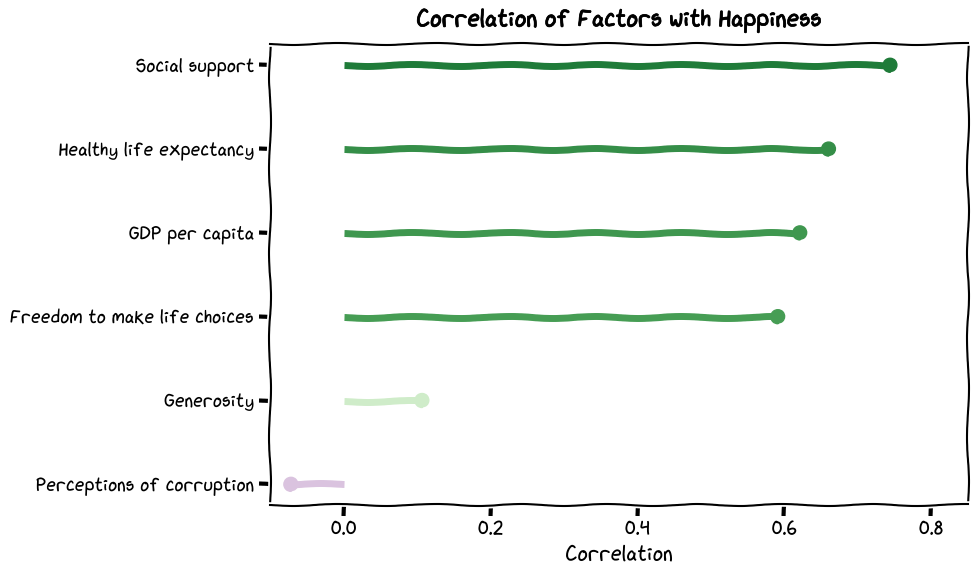

Insight 1: the strongest driver is Social support (r=0.744)
Insight 2: the factors with the strongest influence are Social support (r=0.744), Healthy life expectancy (r=0.660), GDP per capita (r=0.621)
Note: Perceptions of corruption has been inverted so that higher values represent higher happiness


In [6]:
# Lollipop chart for the correlation between Happiness and contributing factors
factors = ['GDP per capita', 'Social support', 
           'Healthy life expectancy', 'Freedom to make life choices', 
           'Generosity', 'Perceptions of corruption']

corrs = (df[factors + ['Happiness score']].corr()['Happiness score']
        .drop('Happiness score'))
corrs['Perceptions of corruption'] *= -1
corrs = corrs.sort_values(ascending=True)

colors = cmap_sns(norm_corr(corrs.values))

plt.figure(figsize=(10,6))
plt.hlines(y=corrs.index, xmin=0, xmax=corrs.values, color=colors, linewidth=5)
plt.scatter(corrs.values, corrs.index, color=colors, s=80)
plt.title('Correlation of Factors with Happiness', y=1.02).set_path_effects([
    path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Correlation')
plt.xlim(-0.1, 0.85)
plt.tight_layout()
output_path = os.path.join(
        visualizations_folder, 'lollipop_chart_correlation.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

# Insights
strongest_factor = corrs.abs().idxmax()
strongest_corr = corrs.abs().max()
significant_factors = corrs[corrs.abs() >= 0.6].sort_values(ascending=False) 
print(f'Insight 1: the strongest driver is {strongest_factor} '
      f'(r={strongest_corr:.3f})')
if len(significant_factors) > 1:
        text = ', '.join([f'{factor} (r={value:.3f})'
                          for factor, value in significant_factors.items()])
        print(f'Insight 2: the factors with the strongest influence are {text}')
print(f'Note: Perceptions of corruption has been inverted so that higher '
      f'values represent higher happiness')

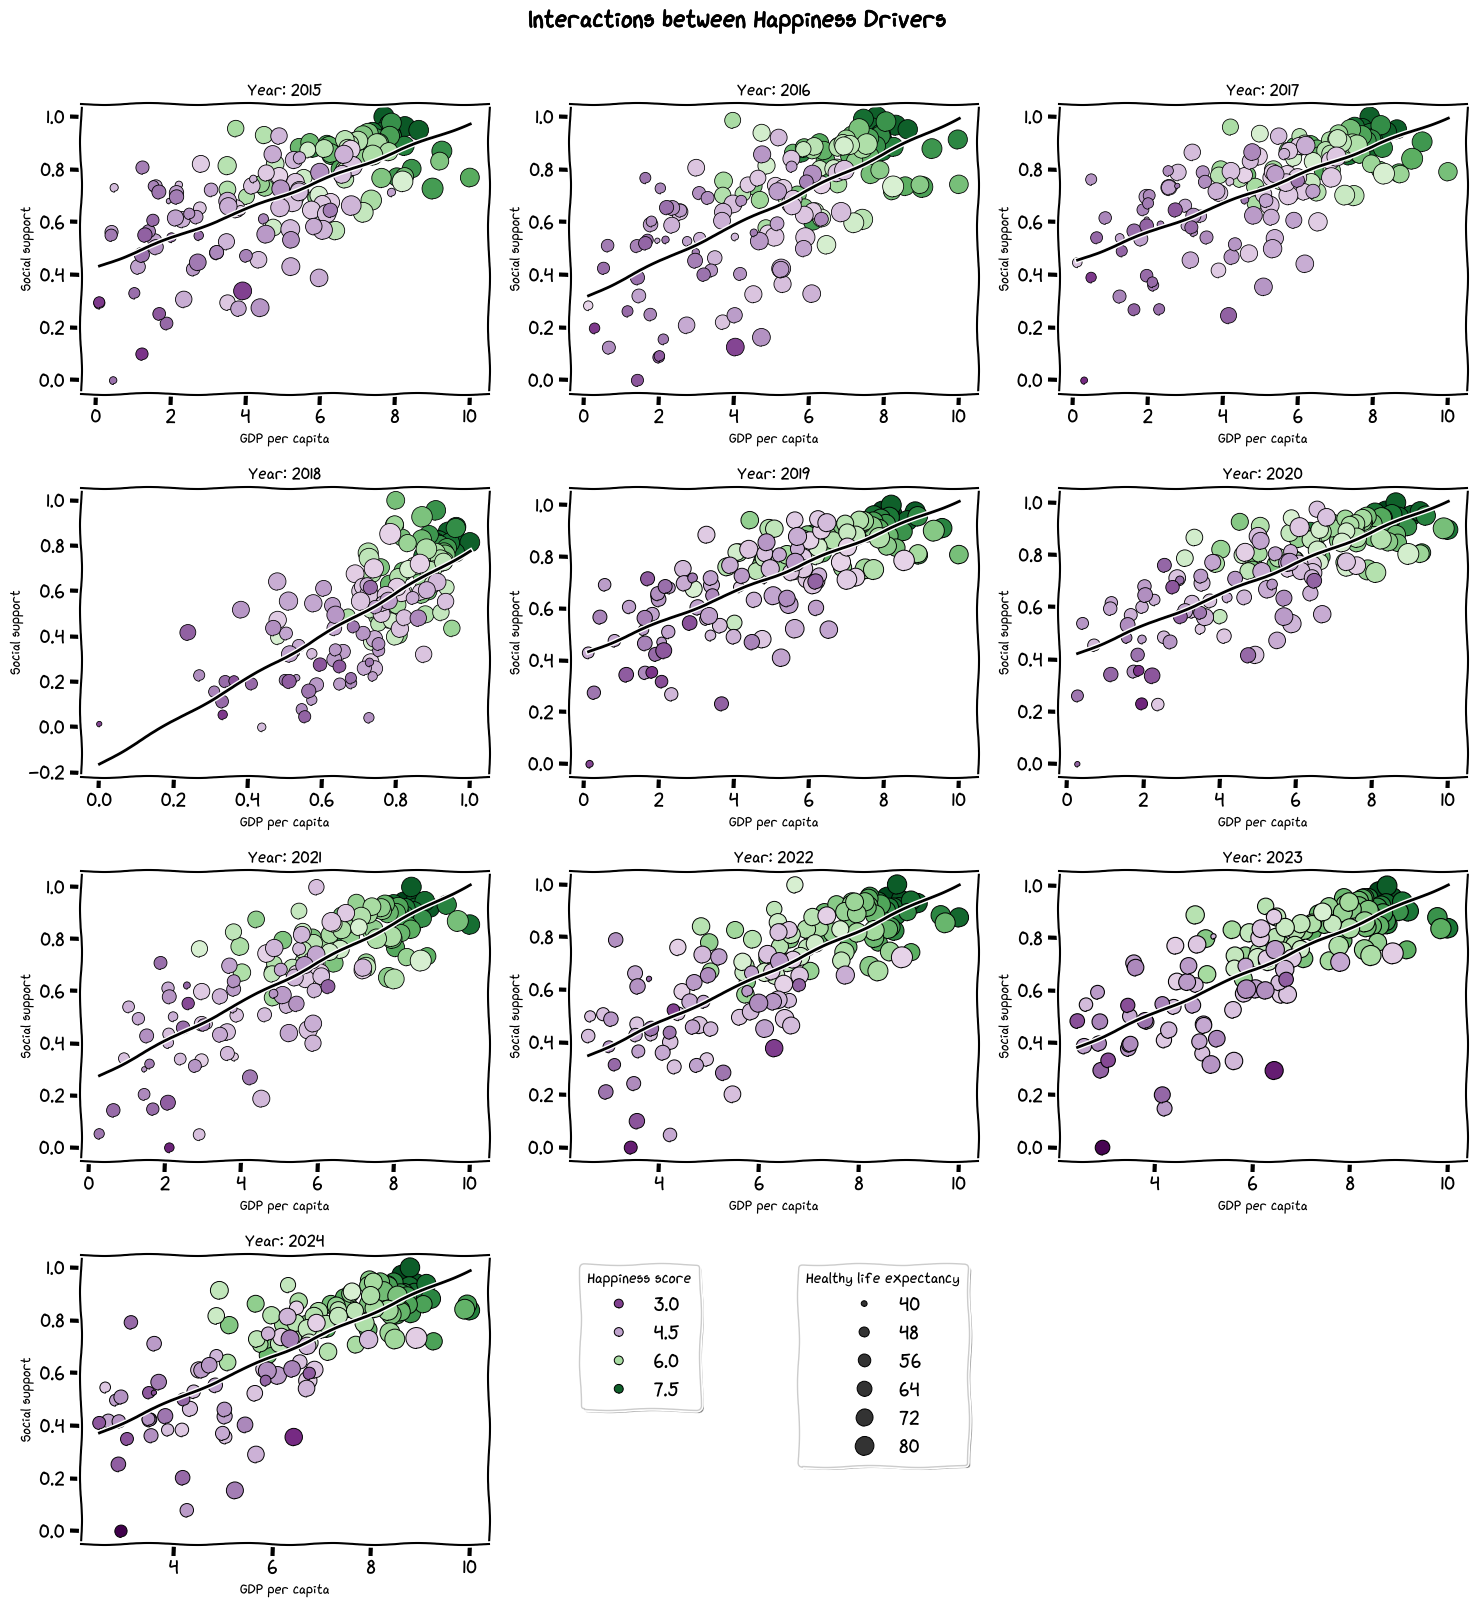

In [15]:
# Scatter plot for the interaction among factors per Year
years = sorted(df['Year'].unique())
n_years = len(years)
n_cols = 3
n_rows = (n_years + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

plt.suptitle('Interactions between Happiness Drivers',
             fontsize=18, fontweight='bold', y=1.005).set_path_effects([
    path_effects.withStroke(linewidth=0.5, foreground='black')
])

# Dummy plot to extract the overall legend
fig_dummy, ax_dummy = plt.subplots()

dummy = sns.scatterplot(
    data=df, x='GDP per capita', y='Social support',
    hue='Happiness score', size='Healthy life expectancy',
    sizes=(10, 200), palette=cmap_sns_uniform, hue_norm=norm,
    edgecolor='black', ax=ax_dummy
)
handles, labels = dummy.get_legend_handles_labels()
plt.close(fig_dummy)

# Real plot for every Year
for i, year in enumerate(years):
    ax = axes[i]
    df_year = df[df['Year'] == year]
    
    sns.scatterplot(
        data=df_year, x='GDP per capita', y='Social support',
        hue='Happiness score', size='Healthy life expectancy',
        sizes=(10, 200), palette=cmap_sns_uniform, hue_norm=norm,
        edgecolor='black', ax=ax, legend=False)
    
    sns.regplot(
        data=df_year, x='GDP per capita', y='Social support',
        scatter=False, ax=ax, color='black', ci=None, line_kws={'linewidth': 2}
    )
    
    ax.set_title(f'Year: {year}', fontsize=12)
    ax.set_xlabel('GDP per capita', fontsize=10)
    ax.set_ylabel('Social support', fontsize=10)
    ax.tick_params(labelbottom=True, labelleft=True)

# Hide empty axes
for j in range(n_years, len(axes)):
    axes[j].axis('off')

# Insert the legend
legend_ax_idx = n_years
if legend_ax_idx < len(axes):
    legend_ax = axes[legend_ax_idx]
    legend_ax.axis('off')
    
    split_idx = labels.index('Healthy life expectancy')
    handles_happiness = handles[1:split_idx]
    labels_happiness = labels[1:split_idx]
    handles_health = handles[split_idx+1:]
    labels_health = labels[split_idx+1:]
    
    legend1 = legend_ax.legend(
        handles_happiness, labels_happiness, loc='upper left', 
        title='Happiness score', title_fontsize=11,
        frameon=True, fancybox=True, shadow=True)
    legend_ax.add_artist(legend1)
    
    legend2 = legend_ax.legend(
        handles_health, labels_health, loc='upper right',
        title='Healthy life expectancy', title_fontsize=11,
        frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'scatter_plot_factor_correlation.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

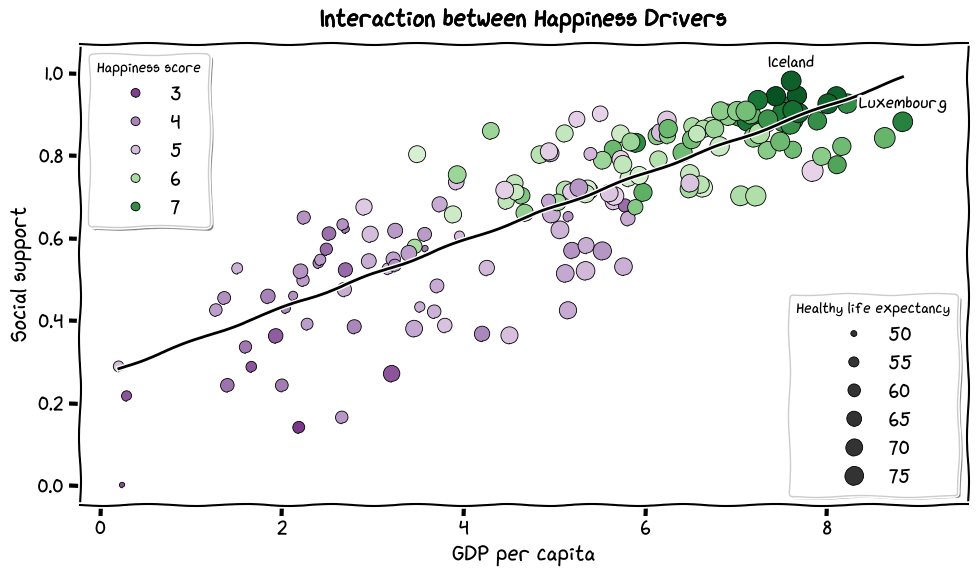

In [3]:
# Scatter plot for the interaction among factors
df_counts = df.groupby('Country standardized')['Happiness score'].count()
valid_countries = df_counts[df_counts > 1].index

df_country = df.groupby('Country standardized', as_index=False).agg({
    'GDP per capita': 'mean',
    'Social support': 'mean',
    'Happiness score': 'mean',
    'Healthy life expectancy': 'mean'
})
df_country = df_country[df_country[
    'Country standardized'].isin(valid_countries)]

plt.figure(figsize=(10,6))
ax = plt.gca()
    
sns.scatterplot(
    data=df_country, x='GDP per capita', y='Social support',
    hue='Happiness score', size='Healthy life expectancy',
    sizes=(10, 200), palette=cmap_sns_uniform, hue_norm=norm,
    edgecolor='black', ax=ax)
    
sns.regplot(
    data=df_country, x='GDP per capita', y='Social support',
    scatter=False, ax=ax, color='black', ci=None, line_kws={'linewidth': 2}
)
    
ax.set_title('Interaction between Happiness Drivers', 
             y=1.02).set_path_effects([
                 path_effects.withStroke(linewidth=0.5, foreground='black')
])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Social support')
ax.tick_params(axis='both')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_margin = (x_max - x_min) * 0.03
y_margin = (y_max - y_min) * 0.03
ax.set_xlim(x_min, x_max + x_margin)
ax.set_ylim(y_min, y_max + y_margin)

# Country with highest Social Support
row_social = df_country.loc[df_country['Social support'].idxmax()]
ax.annotate(
    row_social['Country standardized'],
    xy=(row_social['GDP per capita'], row_social['Social support']),
    xytext=(0, 10), textcoords='offset points',
    ha='center', fontsize=12
)

row_gdp = df_country.loc[df_country['GDP per capita'].idxmax()]
ax.annotate(
    row_gdp['Country standardized'],
    xy=(row_gdp['GDP per capita'], row_gdp['Social support']),
    xytext=(0, 10), textcoords='offset points',
    ha='center', fontsize=12
)

# Insert the legend
handles, labels = ax.get_legend_handles_labels()
split_idx = labels.index('Healthy life expectancy')

legend1 = ax.legend(
    handles[1:split_idx], labels[1:split_idx], loc='upper left', 
    title='Happiness score', title_fontsize=11,
    frameon=True, fancybox=True, shadow=True)
ax.add_artist(legend1)
    
ax.legend(
    handles[split_idx+1:], labels[split_idx+1:], loc='lower right',
    title='Healthy life expectancy', title_fontsize=11,
    frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'scatter_plot_factor_correlation_unique.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

#### "How have countries and regions developed in terms of happiness from 2015 to 2024?"

In [49]:
# Choropleth map for Happiness score per Year
overall_mean = df["Happiness score"].mean()

fig = px.choropleth(
    df,
    locations='Country iso3',
    color='Happiness score',
    hover_name='Country standardized',
    animation_frame='Year',
    range_color=[
        df['Happiness score'].min(),
        df['Happiness score'].max()
    ]
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=50),

    title={
        'text': '<b>Happiness Trend by Country (2015-2024)</b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'black'}
    },

    coloraxis=dict(
        colorscale=colorscale,
        cmin=df['Happiness score'].min(),
        cmid=overall_mean,
        cmax=df['Happiness score'].max(),
    ),

    coloraxis_colorbar=dict(
        title='Happiness score', lenmode='fraction',
        len=0.75, yanchor='middle', y=0.5, x=1.02,
        title_font_color='black',
        tickfont_color='black'
    ),

    geo=dict(showframe=False, showcoastlines=False,
             projection_type='natural earth'),

    sliders=[{
        'active': 0,
        'x': 0.13,
        'y': -0.1,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'currentvalue': {
            'prefix': 'Year=',
            'visible': True,
            'xanchor': 'center'
        },
        'len': 0.9,
        'font': {
            'color': 'black'
        }
    }],

    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.05,
        'y': -0.01,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'buttons': [
            {
                'label': '▶',
                'method': 'animate',
                'args': [None, 
                         {'frame': {'duration': 1000, 'redraw': True}, 
                          'fromcurrent': True,
                          'transition': {'duration': 300}}]
            },
            {
                'label': '■',
                'method': 'animate',
                'args': [[None], 
                         {'frame': {'duration': 0, 'redraw': True}, 
                          'mode': 'immediate', 
                          'transition': {'duration': 0}}]
            }
        ]
    }]
)

output_path = os.path.join(visualizations_folder, 'interactive_happiness_map.html')
fig.write_html(output_path)
fig.show()

In [ ]:
# Overall choropleth map for Happiness score
df_mean = (df.groupby(['Country iso3', 'Country standardized'], as_index=False)
           ['Happiness score'].mean())
overall_mean = df['Happiness score'].mean()

fig = px.choropleth(
    df_mean,
    locations='Country iso3',
    color='Happiness score',
    hover_name='Country standardized',
    range_color=[
        df['Happiness score'].min(),
        df['Happiness score'].max()
    ]
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=50),

    title={
        'text': '<b>Average Happiness Score by Country (2015-2024)</b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'black'}
    },

    coloraxis=dict(
        colorscale=colorscale,
        cmin=df['Happiness score'].min(),
        cmid=overall_mean,
        cmax=df['Happiness score'].max(),
    ),

    coloraxis_colorbar=dict(
        title='Happiness score', lenmode='fraction',
        len=0.75, yanchor='middle', y=0.5, x=1.02,
        title_font_color='black',
        tickfont_color='black'
    ),

    geo=dict(
        showframe=False, showcoastlines=False,
        projection_type='natural earth'
    )
)

output_path = os.path.join(visualizations_folder, 'happiness_map.png')
fig.write_image(output_path, scale=3)
fig.show()

In [ ]:
# Choropleth map for Happiness score in Europe per Year
# with colors defined according to the European mean
df_europe = df[df['Continent'] == 'Europe']
european_mean = df_europe['Happiness score'].mean()

fig = px.choropleth(
    df_europe,
    locations='Country iso3',
    color='Happiness score',
    hover_name='Country standardized',
    animation_frame='Year',
    range_color=[
        df_europe['Happiness score'].min(),
        df_europe['Happiness score'].max()
    ]
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=50),

    title={
        'text': '<b>Happiness Trend in Europe by Country (2015-2024)</b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'black'}
    },

    coloraxis=dict(
        colorscale=colorscale_europe,
        cmin=df_europe['Happiness score'].min(),
        cmid=european_mean,
        cmax=df_europe['Happiness score'].max(),
    ),

    coloraxis_colorbar=dict(
        title='Happiness score', lenmode='fraction',
        len=0.75, yanchor='middle', y=0.5, x=1.02,
        title_font_color='black',
        tickfont_color='black'
    ),

    geo=dict(showframe=False, showcoastlines=False,
             projection_type='natural earth',
             lataxis_range=[25, 80], lonaxis_range=[-15, 180], 
             ),

    sliders=[{
        'active': 0,
        'x': 0.13,
        'y': -0.1,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'currentvalue': {
            'prefix': 'Year=',
            'visible': True,
            'xanchor': 'center'
        },
        'len': 0.9,
        'font': {
            'color': 'black'
        }
    }],

    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.05,
        'y': -0.01,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'buttons': [
            {
                'label': '▶',
                'method': 'animate',
                'args': [None, 
                         {'frame': {'duration': 1000, 'redraw': True}, 
                          'fromcurrent': True,
                          'transition': {'duration': 300}}]
            },
            {
                'label': '■',
                'method': 'animate',
                'args': [[None], 
                         {'frame': {'duration': 0, 'redraw': True}, 
                          'mode': 'immediate', 
                          'transition': {'duration': 0}}]
            }
        ]
    }]
)

output_path = os.path.join(
    visualizations_folder, 'interactive_happiness_europe_map.html')
fig.write_html(output_path)
fig.show()

In [56]:
# Choropleth map for Happiness score in Europe per Year
# with colors defined according to the European mean
# with a better focus on the centre of Europe
df_europe = df[df['Continent'] == 'Europe']
european_mean = df_europe['Happiness score'].mean()

fig = px.choropleth(
    df_europe,
    locations='Country iso3',
    color='Happiness score',
    hover_name='Country standardized',
    animation_frame='Year',
    range_color=[
        df_europe['Happiness score'].min(),
        df_europe['Happiness score'].max()
    ]
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=50),

    title={
        'text': '<b>Happiness Trend in Europe by Country (2015-2024)</b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16, 'color': 'black'}
    },

    coloraxis=dict(
        colorscale=colorscale_europe,
        cmin=df_europe['Happiness score'].min(),
        cmid=european_mean,
        cmax=df_europe['Happiness score'].max(),
    ),

    coloraxis_colorbar=dict(
        title='Happiness score', lenmode='fraction',
        len=0.75, yanchor='middle', y=0.5, x=1.02
    ),

    geo=dict(showframe=False, showcoastlines=False,
             projection_type='natural earth',
             lataxis_range=[25, 80], lonaxis_range=[-15, 60], 
             ),

    sliders=[{
        'active': 0,
        'x': 0.13,
        'y': -0.1,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'currentvalue': {
            'prefix': 'Year=',
            'visible': True,
            'xanchor': 'center'
        },
        'len': 0.9,
        'font': {
            'color': 'black'
        }
    }],

    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.05,
        'y': -0.01,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'buttons': [
            {
                'label': '▶',
                'method': 'animate',
                'args': [None, 
                         {'frame': {'duration': 1000, 'redraw': True}, 
                          'fromcurrent': True,
                          'transition': {'duration': 300}}]
            },
            {
                'label': '■',
                'method': 'animate',
                'args': [[None], 
                         {'frame': {'duration': 0, 'redraw': True}, 
                          'mode': 'immediate', 
                          'transition': {'duration': 0}}]
            }
        ]
    }]
)

fig.show()

# Save the legend by creating a dummy plot
color_settings = fig.layout.coloraxis
dummy_trace = go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='markers',
    marker=dict(
        color=[color_settings.cmin, color_settings.cmax],
        colorscale=color_settings.colorscale,
        cmin=color_settings.cmin,
        cmax=color_settings.cmax,
        showscale=True, 
        
        colorbar=dict(
            title='Happiness score',
            title_side='top',
            title_font_color='black',
            tickfont_color='black',
            lenmode='fraction',
            len=1.0,
            orientation='h',
            yanchor='top',
            y=0.5, 
            x=0.5,
            thickness=50
        )
    ),
    showlegend=False
)

fig_legend = go.Figure(data=[dummy_trace])
fig_legend.update_layout(
    xaxis=dict(visible=False, showgrid=False, zeroline=False),
    yaxis=dict(visible=False, showgrid=False, zeroline=False),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    coloraxis=None, 
    
    margin=dict(l=10, r=10, t=10, b=10),
    height=200,
    width=600
)

output_folder = 'visualizations/europe_maps'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'legend.png')
fig_legend.write_image(output_path, scale=3)

# Save each frame as an image
for frame in fig.frames:
    year = frame.name
    fig_static = go.Figure(data=frame.data)

    if fig_static.data:
        fig_static.data[0].showscale = False
    
    fig_static.update_layout(
        title_text=f'<b>Happiness in Europe ({year})</b>',
        title_x=0.5,
        title_font=dict(color='black'),
        geo=dict(
            showframe=False, showcoastlines=False,
            projection_type='natural earth',
            lataxis_range=[25, 80], lonaxis_range=[-15, 60]
        ),
        coloraxis=dict(
            colorscale=fig.layout.coloraxis.colorscale,
            cmin=fig.layout.coloraxis.cmin,
            cmid=fig.layout.coloraxis.cmid,
            cmax=fig.layout.coloraxis.cmax,
            showscale=False
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        sliders=[], updatemenus=[]
    )

    output_path = os.path.join(output_folder, f'happiness_europe_map_{year}.png')
    fig_static.write_image(output_path, scale=3)

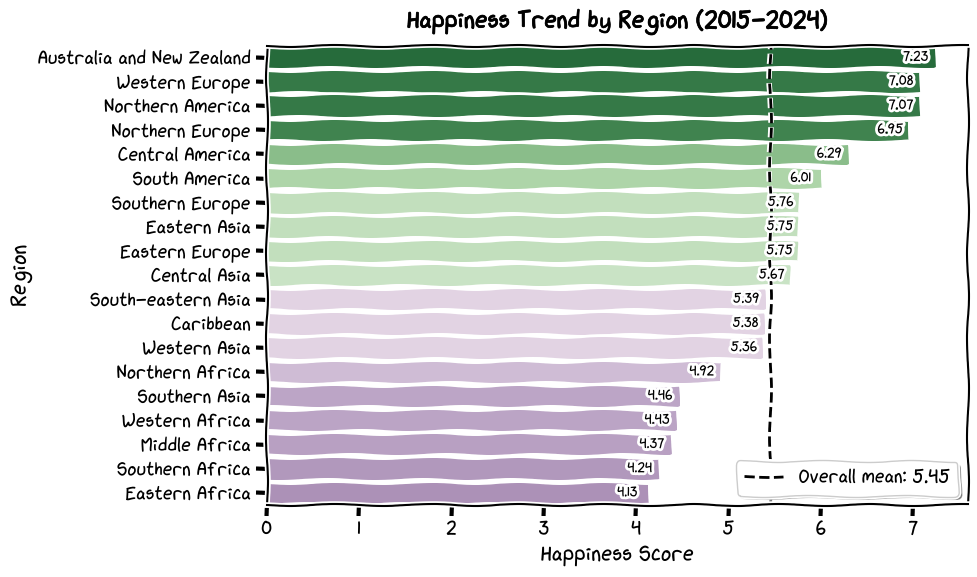

Insight 1: the highest average region is Australia and New Zealand (7.230), and the lowest average region is Eastern Africa (4.133)
Insight 2: the regional gap is 3.096 points


In [5]:
# Histogram with average Happiness score for each Region
overall_mean = df['Happiness score'].mean()
regional_avg = (df.groupby('Region standardized')['Happiness score']
                .mean()
                .sort_values(ascending=False)
                .reset_index(name='Mean happiness score'))

# Map normalized values to colors
colors = [cmap_sns_uniform(norm(val)) 
          for val in regional_avg['Mean happiness score']]

# Plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=regional_avg, 
                      x='Mean happiness score', y='Region standardized', 
                      palette=colors, hue='Region standardized', 
                      orient='h', legend=False)

# Add vertical line for overall mean
plt.axvline(overall_mean, color='black', linestyle='--', linewidth=2,
            label=f'Overall mean: {overall_mean:.2f}')

# Add values to each bar
for bar in barplot.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    barplot.text(
        width - 0.34, y, f'{width:.2f}',
        ha='left', va='center', fontsize=10)

plt.title('Happiness Trend by Region (2015-2024)', y=1.02).set_path_effects([
    path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Happiness Score')
plt.ylabel('Region')
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'barplot_region_happiness.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

# Insights
top = regional_avg.loc[regional_avg['Mean happiness score'].idxmax()]
bottom = regional_avg.loc[regional_avg['Mean happiness score'].idxmin()]
print(f'Insight 1: the highest average region is {top["Region standardized"]} '
      f'({top["Mean happiness score"]:.3f}), and the lowest average region is '
      f'{bottom["Region standardized"]} ({bottom["Mean happiness score"]:.3f})')
print(f'Insight 2: the regional gap is '
      f"{top['Mean happiness score'] - bottom['Mean happiness score']:.3f} "
      'points')

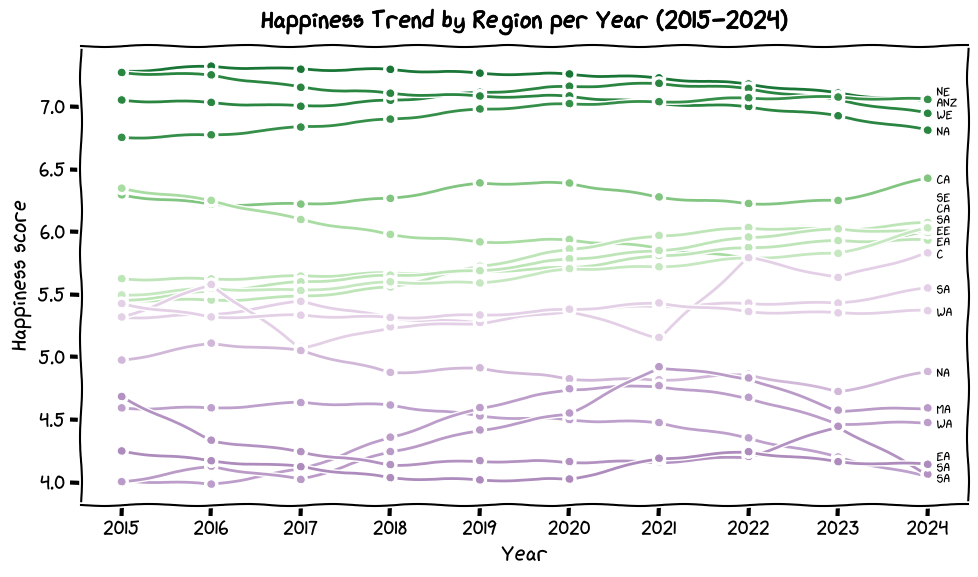

In [21]:
# Line plot with average Happiness score for each Region per Year
regional_avg = (df.groupby('Region standardized')['Happiness score']
                .mean().sort_values(ascending=False)) 
regions_sorted = regional_avg.index.tolist() 
region_colors = {region: cmap_sns_uniform(norm(val)) 
                 for region, val in regional_avg.items()} 
palette_ordered = [region_colors[r] for r in regions_sorted] 

annual_avg = (df.groupby(['Year', 'Region standardized'])['Happiness score']
              .mean().reset_index(name='Mean happiness score'))

region_abbreviations = {}
for region in regions_sorted:
    abbrev = ''.join(re.findall(r'[A-Z]', region))
    if not abbrev:
        abbrev = region.replace(' ', '')[:3].upper()
        
    region_abbreviations[region] = abbrev

# Define the label
last_year_data = annual_avg[annual_avg['Year'] == df['Year'].max()]

labels_to_place = []
for index, row in last_year_data.iterrows():
    region = row['Region standardized']
    if region in region_abbreviations:
        labels_to_place.append({
            'region': region,
            'y_original': row['Mean happiness score'],
            'y_adjusted': row['Mean happiness score'] - 0.02,
            'abbrev': region_abbreviations[region]
        })

labels_to_place.sort(key=lambda x: x['y_original'])

for i in range(1, len(labels_to_place)):
    current_label = labels_to_place[i]
    previous_label = labels_to_place[i-1]
        
    distance = current_label['y_adjusted'] - previous_label['y_adjusted']
    if distance < 0.088:
        current_label['y_adjusted'] = previous_label['y_adjusted'] + 0.088
        
    labels_to_place[i] = current_label
    
plt.figure(figsize=(10, 6))
ax = plt.gca()

for region in regions_sorted:
    region_data = annual_avg[annual_avg['Region standardized'] == region]

    sns.lineplot(
        data=region_data, x='Year', y='Mean happiness score',
        color=region_colors[region], marker='o', linewidth=2,
        ax=ax, legend=False
    )

for item in labels_to_place:
    ax.text(
        annual_avg['Year'].max() + 0.1, item['y_adjusted'],
        item['abbrev'], color='black',
        va='center', ha='left',   
        fontsize=9, fontweight='bold')

plt.title('Happiness Trend by Region per Year (2015-2024)', 
          y=1.02).set_path_effects([
              path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Year')
plt.ylabel('Happiness score')
plt.xticks(sorted(annual_avg['Year'].unique()))

y_min, y_max = ax.get_ylim()
y_max_adjusted = max(item['y_adjusted'] for item in labels_to_place)
if y_max_adjusted > y_max:
    ax.set_ylim(y_min, y_max_adjusted + 0.08)

plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'line_plot_region_happiness.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

#### “Has global happiness inequalities increased or decreased?”

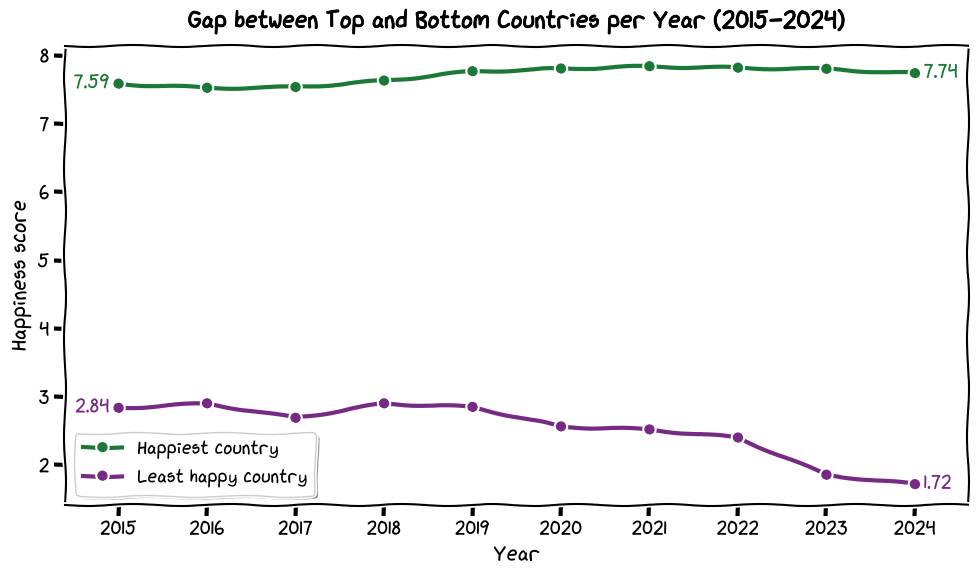

In [14]:
# Slope graph for the difference between top Country and bottom Country
annual_country_avg = (df.groupby(['Year', 'Country standardized'])
                      ['Happiness score'].mean()
                      .reset_index(name='Mean happiness score'))
country_gap = (annual_country_avg.groupby('Year')
               ['Mean happiness score'].agg(['max', 'min']))
country_gap['gap'] = country_gap['max'] - country_gap['min']

plt.figure(figsize=(10,6))
plt.plot(country_gap.index, country_gap['max'],
         marker='o', linewidth=3, 
         color=colorscale[8][1], label='Happiest country')

plt.plot(country_gap.index, country_gap['min'],
         marker='o', linewidth=3, 
         color=colorscale[1][1], label='Least happy country')

plt.title('Gap between Top and Bottom Countries per Year (2015-2024)', 
          y=1.02).set_path_effects([
              path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Year')
plt.ylabel('Happiness score')
plt.xticks(country_gap.index)
plt.xlim(country_gap.index.min() - 0.6, country_gap.index.max() + 0.6)

plt.text(country_gap.index[0] - 0.1, country_gap['max'].iloc[0],
         f"{country_gap['max'].iloc[0]:.2f}", 
         va='center', ha='right', color=colorscale[8][1])

plt.text(country_gap.index[-1] + 0.1, country_gap['max'].iloc[-1],
         f"{country_gap['max'].iloc[-1]:.2f}", 
         va='center', ha='left', color=colorscale[8][1])

plt.text(country_gap.index[0] - 0.1, country_gap['min'].iloc[0],
         f"{country_gap['min'].iloc[0]:.2f}", 
         va='center', ha='right', color=colorscale[1][1])

plt.text(country_gap.index[-1] + 0.1, country_gap['min'].iloc[-1],
         f"{country_gap['min'].iloc[-1]:.2f}", 
         va='center', ha='left', color=colorscale[1][1])

plt.legend(frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'line_plot_country_gap.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

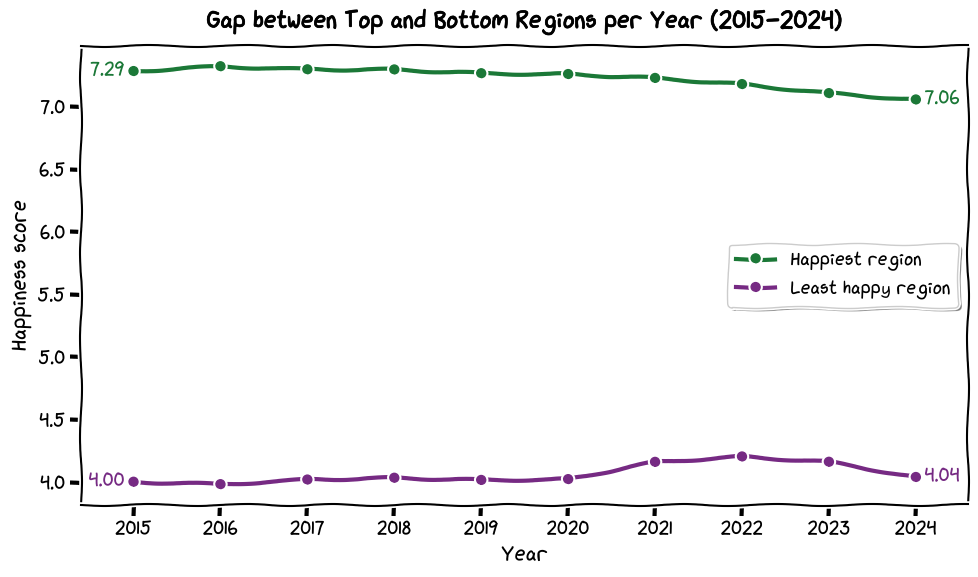

In [13]:
# Slope graph for the difference between top Region and bottom Region
annual_regional_avg = (df.groupby(['Year', 'Region standardized'])
                      ['Happiness score'].mean()
                      .reset_index(name='Mean happiness score'))
regional_gap = (annual_regional_avg.groupby('Year')
                ['Mean happiness score'].agg(['max', 'min']))
regional_gap['gap'] = regional_gap['max'] - regional_gap['min']

plt.figure(figsize=(10,6))
plt.plot(regional_gap.index, regional_gap['max'],
         marker='o', linewidth=3, 
         color=colorscale[8][1], label='Happiest region')

plt.plot(regional_gap.index, regional_gap['min'],
         marker='o', linewidth=3, 
         color=colorscale[1][1], label='Least happy region')

plt.title('Gap between Top and Bottom Regions per Year (2015-2024)', 
          y=1.02).set_path_effects([
              path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Year')
plt.ylabel('Happiness score')
plt.xticks(regional_gap.index)
plt.xlim(regional_gap.index.min() - 0.6, regional_gap.index.max() + 0.6)

plt.text(regional_gap.index[0] - 0.1, regional_gap['max'].iloc[0],
         f"{regional_gap['max'].iloc[0]:.2f}", 
         va='center', ha='right', color=colorscale[8][1])

plt.text(regional_gap.index[-1] + 0.1, regional_gap['max'].iloc[-1],
         f"{regional_gap['max'].iloc[-1]:.2f}", 
         va='center', ha='left', color=colorscale[8][1])

plt.text(regional_gap.index[0] - 0.1, regional_gap['min'].iloc[0],
         f"{regional_gap['min'].iloc[0]:.2f}", 
         va='center', ha='right', color=colorscale[1][1])

plt.text(regional_gap.index[-1] + 0.1, regional_gap['min'].iloc[-1],
         f"{regional_gap['min'].iloc[-1]:.2f}", 
         va='center', ha='left', color=colorscale[1][1])

plt.legend(frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'line_plot_region_gap.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

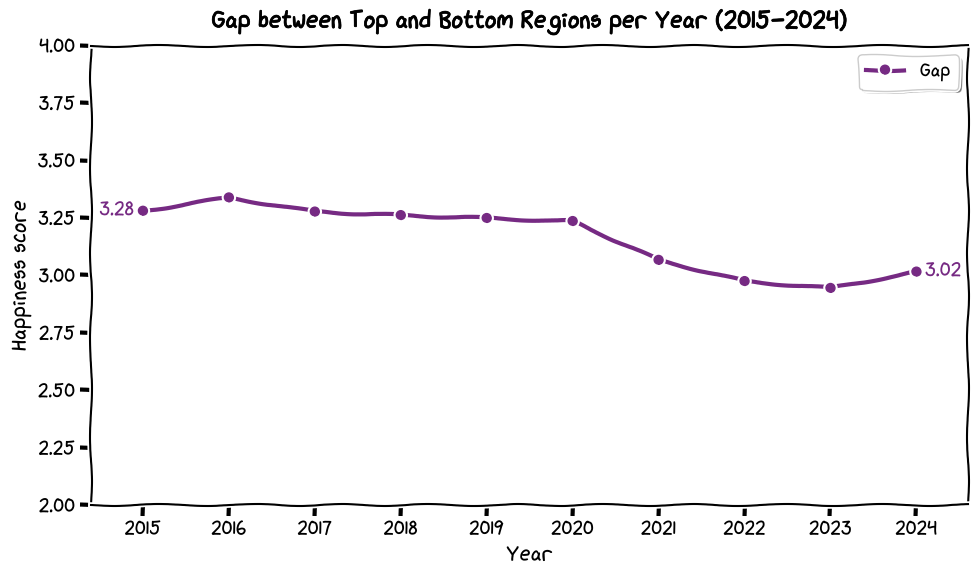

In [7]:
# Slope graph for the difference between top Region and bottom Region
annual_regional_avg = (df.groupby(['Year', 'Region standardized'])
                      ['Happiness score'].mean()
                      .reset_index(name='Mean happiness score'))
regional_gap = (annual_regional_avg.groupby('Year')
                ['Mean happiness score'].agg(['max', 'min']))
regional_gap['gap'] = regional_gap['max'] - regional_gap['min']

plt.figure(figsize=(10,6))
plt.plot(regional_gap.index, regional_gap['gap'],
         marker='o', linewidth=3, 
         color=colorscale[1][1], label='Gap')

plt.title('Gap between Top and Bottom Regions per Year (2015-2024)', 
          y=1.02).set_path_effects([
              path_effects.withStroke(linewidth=0.5, foreground='black')
])
plt.xlabel('Year')
plt.ylabel('Happiness score')
plt.xticks(regional_gap.index)
plt.xlim(regional_gap.index.min() - 0.6, regional_gap.index.max() + 0.6)
plt.ylim(2, 4)

plt.text(regional_gap.index[0] - 0.1, regional_gap['gap'].iloc[0],
         f"{regional_gap['gap'].iloc[0]:.2f}", 
         va='center', ha='right', color=colorscale[1][1])

plt.text(regional_gap.index[-1] + 0.1, regional_gap['gap'].iloc[-1],
         f"{regional_gap['gap'].iloc[-1]:.2f}", 
         va='center', ha='left', color=colorscale[1][1])

plt.legend(frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
output_path = os.path.join(
    visualizations_folder, 'line_plot_gap.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

#### "How do top and bottom regions differ in terms of happiness drivers?"

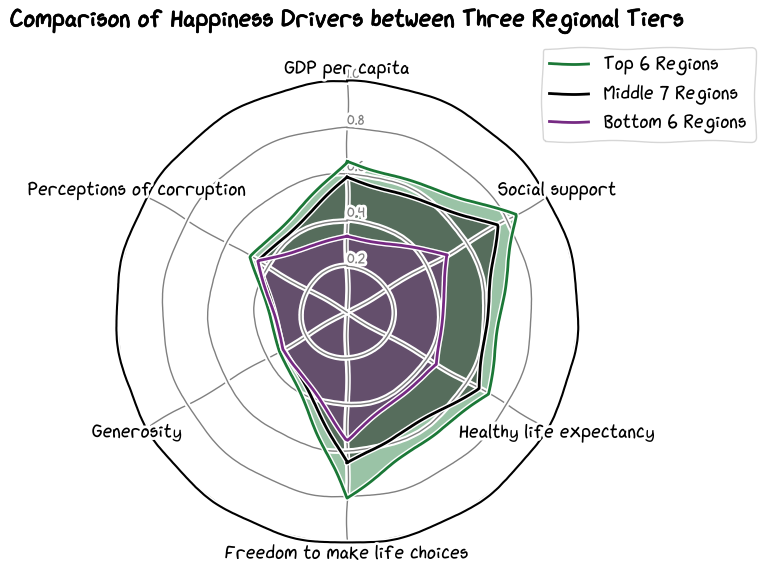

In [26]:
# Radar chart for Happiness factors between Regions
variables_to_compare = [
    'GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 
    'Perceptions of corruption'
]
group_labels = ['Top 6 Regions', 'Middle 7 Regions', 'Bottom 6 Regions']

overall_regional_avg = (
    df.groupby('Region standardized')['Happiness score']
    .mean()
    .sort_values(ascending=False)
)

# Define the three groups
top_tier_regions = overall_regional_avg.head(6).index.tolist()
middle_tier_regions = overall_regional_avg.iloc[6:13].index.tolist()
bottom_tier_regions = overall_regional_avg.tail(6).index.tolist()

# Determine average statistics for each group
groups_data = {}
all_regions = [top_tier_regions, middle_tier_regions, bottom_tier_regions]

for i, regions_list in enumerate(all_regions):
    group_name = group_labels[i] 
    df_group = df[df['Region standardized'].isin(regions_list)]
    
    avg_scores = df_group[variables_to_compare].mean().to_dict()
    groups_data[group_name] = avg_scores

df_raw_avg = pd.DataFrame(groups_data).T
df_normalized = df_raw_avg.copy()

# Normalize each mean value
for metric in variables_to_compare:
    min_val = df[metric].min()
    max_val = df[metric].max()
    df_normalized[metric] = (
        df_normalized[metric] - min_val) / (max_val - min_val)

# Define the plot
num_vars = len(variables_to_compare)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(polar=True))

def plot_radar(row_data, color, label):
    values = row_data.values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, color=color, 
            linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.25)

colors = [colorscale[8][1], 'black', colorscale[1][1]]

for i, group in enumerate(group_labels):
    plot_radar(df_normalized.loc[group], colors[i], group)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables_to_compare, color='black')

ax.set_rlabel_position(0)
ax.set_yticks(np.arange(0.2, 1.2, 0.2))
ax.set_yticklabels([f'{x:.1f}' for x in np.arange(0.2, 1.2, 0.2)], 
                   color='gray', size=10)
ax.set_ylim(0, 1)

# Bring axis labels to the foreground
ax.set_xticklabels([])
for angle, label in zip(angles[:-1], variables_to_compare):
    ax.text(
        angle, 1.05, label,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontweight='bold',
        zorder=10
    )

ax.set_title('Comparison of Happiness Drivers between Three Regional Tiers', 
             y=1.1, color='black').set_path_effects([
                 path_effects.withStroke(linewidth=0.5, foreground='black')
])
ax.legend(loc='lower left', bbox_to_anchor=(0.9, 0.85))
ax.grid(True, color='gray', linewidth=1.0, linestyle='-')

output_path = os.path.join(
    visualizations_folder, 'radar_chart_factors.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

#### "Are the top 10 and the bottom 10 countries stable or do they change year to year?"

In [27]:
# Animated bar chart for top 10 Countries
top10_countries = (
    df.sort_values(['Year', 'Happiness score'], ascending=[True, False])
      .groupby('Year')
      .head(10)
      .reset_index(drop=True)
)
years = sorted(top10_countries['Year'].unique())

green_stops = [colorscale[5][1], colorscale[6][1], colorscale[7][1],
               colorscale[8][1], colorscale[9][1]]
cmap = LinearSegmentedColormap.from_list('greens', green_stops)
green_palette = [to_hex(cmap(i)) for i in np.linspace(0, 1, 10)]

# First year plot
first_year_data = (
    top10_countries[top10_countries['Year'] == years[0]]
    .sort_values('Happiness score', ascending=False)
)
n_colors = len(green_palette)
colors_first = [green_palette[n_colors - 1 - i] 
                for i in range(len(first_year_data))]

fig = go.Figure(
    data=[
        go.Bar(
            x=first_year_data['Happiness score'],
            y=first_year_data['Country standardized'],
            orientation='h',
            marker=dict(color=colors_first),
            text=first_year_data['Happiness score'].round(2),
            textposition='inside',
            texttemplate='%{text}',
            ids=first_year_data['Country standardized'],
            showlegend=False
        )
    ]
)

# Frames for simulating the animation
frames = []
for year in years:
    year_data = top10_countries[top10_countries['Year'] == year].sort_values(
        'Happiness score', ascending=False)
    colors = [green_palette[n_colors - 1 - i] for i in range(len(year_data))]

    frames.append(
        go.Frame(
            data=[
                go.Bar(
                    x=year_data['Happiness score'],
                    y=year_data['Country standardized'],
                    orientation='h',
                    marker=dict(color=colors),
                    text=year_data['Happiness score'].round(2),
                    textposition='inside',
                    texttemplate='%{text}',
                    ids=year_data['Country standardized']
                )
            ],
            name=str(year)
        )
    )
fig.frames = frames

# Modify the layout
fig.update_layout(
    margin=dict(l=120, r=0, t=50, b=150),

    title=dict(
        text="<b>Top 10 Countries by Happiness per Year (2015–2024)</b>",
        x=0.5,
        font=dict(size=16, color='black')
    ),

    xaxis=dict(
        title='Happiness score',
        title_font=dict(color='black'),
        tickfont=dict(color='black'),
        range=[0, top10_countries['Happiness score'].max() + 1]
    ),

    yaxis=dict(
        title='Country',
        title_font=dict(color='black'),
        tickfont=dict(color='black'),
        autorange='reversed'
    ),

    # Buttons
    updatemenus=[{
        'type': 'buttons',
        'direction': 'right',
        'showactive': False,
        'x': -0.05,
        'y': -0.42,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'buttons': [
            {
                'label': '▶',
                'method': 'animate',
                'args':[None, {'frame': {'duration': 1000, 'redraw': True},
                               'fromcurrent': True,
                               'transition': {'duration': 300}}]
            },
            {
                'label': '■',
                'method': 'animate',
                'args':[[None], {'frame': {'duration': 0, 'redraw': True},
                                 'mode': 'immediate',
                                 'transition': {'duration': 0}}]
            }
        ]
    }],

    # Slider
    sliders=[{
        'active': 0,
        'x': 0.02,
        'y': -0.5,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'currentvalue': {
            'prefix': 'Year=',
            'visible': True,
            'xanchor': 'center'
        },
        'len': 0.9,
        'steps': [
            {
                'args': [[str(year)], 
                         {'frame': {'duration': 800, 'redraw': True}, 
                          'mode':'immediate'}],
                'label': str(year),
                'method':'animate'
            } for year in years
        ],
        'font': {
            'color': 'black'
        }
    }]
)

output_path = os.path.join(
    visualizations_folder, 'interactive_top10_bar_chart_race.html')
fig.write_html(output_path)
fig.show()

In [28]:
# Animated bar chart for bottom 10 Countries
bottom10_countries = (
    df.sort_values(['Year', 'Happiness score'], ascending=[True, False])
      .groupby('Year')
      .tail(10)
      .reset_index(drop=True)
)
years = sorted(bottom10_countries['Year'].unique())

red_stops = [colorscale[0][1], colorscale[1][1], colorscale[2][1],
               colorscale[3][1], colorscale[4][1]]
cmap = LinearSegmentedColormap.from_list('red', red_stops)
red_palette = [to_hex(cmap(i)) for i in np.linspace(0, 1, 10)]

# First year plot
first_year_data = (
    bottom10_countries[bottom10_countries['Year'] == years[0]]
    .sort_values('Happiness score', ascending=False)
)
n_colors = len(red_palette)
colors_first = [red_palette[n_colors - 1 - i] 
                for i in range(len(first_year_data))]

fig = go.Figure(
    data=[
        go.Bar(
            x=first_year_data['Happiness score'],
            y=first_year_data['Country standardized'],
            orientation='h',
            marker=dict(color=colors_first),
            text=first_year_data['Happiness score'].round(2),
            textposition='inside',
            texttemplate='%{text}',
            ids=first_year_data['Country standardized'],
            showlegend=False
        )
    ]
)

# Frames for simulating the animation
frames = []
for year in years:
    year_data = bottom10_countries[
        bottom10_countries['Year'] == year].sort_values(
        'Happiness score', ascending=False)
    colors = [red_palette[n_colors - 1 - i] for i in range(len(year_data))]

    frames.append(
        go.Frame(
            data=[
                go.Bar(
                    x=year_data['Happiness score'],
                    y=year_data['Country standardized'],
                    orientation='h',
                    marker=dict(color=colors),
                    text=year_data['Happiness score'].round(2),
                    textposition='inside',
                    texttemplate='%{text}',
                    ids=year_data['Country standardized']
                )
            ],
            name=str(year)
        )
    )
fig.frames = frames

# Modify the layout
fig.update_layout(
    margin=dict(l=200, r=0, t=50, b=150),

    title=dict(
        text="<b>Bottom 10 Countries by Happiness per Year (2015–2024)</b>",
        x=0.5,
        font=dict(size=16, color='black')
    ),

    xaxis=dict(
        title='Happiness score',
        title_font=dict(color='black'),
        tickfont=dict(color='black'),
        range=[0, top10_countries['Happiness score'].max() + 1]
    ),

    yaxis=dict(
        title='Country',
        title_font=dict(color='black'),
        tickfont=dict(color='black'),
        autorange='reversed'
    ),

    # Buttons
    updatemenus=[{
        'type': 'buttons',
        'direction': 'right',
        'showactive': False,
        'x': -0.05,
        'y': -0.42,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'buttons': [
            {
                'label': '▶',
                'method': 'animate',
                'args':[None, {'frame': {'duration': 1000, 'redraw': True},
                               'fromcurrent': True,
                               'transition': {'duration': 300}}]
            },
            {
                'label': '■',
                'method': 'animate',
                'args':[[None], {'frame': {'duration': 0, 'redraw': True},
                                 'mode': 'immediate',
                                 'transition': {'duration': 0}}]
            }
        ]
    }],

    # Slider
    sliders=[{
        'active': 0,
        'x': 0.02,
        'y': -0.5,
        'xanchor': 'left',
        'yanchor': 'bottom',
        'currentvalue': {
            'prefix': 'Year=',
            'visible': True,
            'xanchor': 'center'
        },
        'len': 0.9,
        'steps': [
            {
                'args': [[str(year)], 
                         {'frame': {'duration': 800, 'redraw': True}, 
                          'mode':'immediate'}],
                'label': str(year),
                'method':'animate'
            } for year in years
        ],
        'font': {
            'color': 'black'
        }
    }]
)

output_path = os.path.join(
    visualizations_folder, 'interactive_bottom10_bar_chart_race.html')
fig.write_html(output_path)
fig.show()